<a href="https://colab.research.google.com/github/mohit623/SVHN-1/blob/main/CNN_SVHN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.6.9


In [2]:
!conda --version

/bin/bash: conda: command not found


In [5]:
!ls -al

total 240564
drwxr-xr-x 1 root root      4096 Nov 13 00:42 .
drwxr-xr-x 1 root root      4096 Nov 13 00:22 ..
drwxr-xr-x 1 root root      4096 Nov  6 17:30 .config
drwxr-xr-x 1 root root      4096 Nov  6 17:30 sample_data
-rw-r--r-- 1 root root  64275384 Nov 13 00:46 test_32x32.mat
-rw-r--r-- 1 root root 182040794 Nov 13 00:42 train_32x32.mat


In [8]:

!wget https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh && bash Miniconda3-4.5.4-Linux-x86_64.sh -bfp /usr/local
!conda update conda -y -q
!source /usr/local/etc/profile.d/conda.sh
!conda init 
!conda install -n root _license -y -q

--2020-11-13 00:55:07--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2020-11-13 00:55:07--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

Miniconda3-4.5.4-Li 100%[===================>]  55.76M   181MB/s    in 0.3s    

2020-11-13 00:55:08 (181 MB/s) - ‘Miniconda3-4.5.4-Linux-x86_

In [9]:
!conda --version

conda 4.9.2


In [6]:
from google.colab import files
uploaded = files.upload()

Saving cv_proj.yml to cv_proj.yml


In [10]:
!conda env create -f cv_proj.yml

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ 
Found conflicts! Looking for incompatible packages.
This can take several mi

In [11]:
!python --version

Python 3.7.0


In [10]:
!pytorch --version

/bin/bash: pytorch: command not found


In [12]:
import numpy as np
import keras
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [13]:

np.random.seed(20)

In [3]:
!ls -al

total 16
drwxr-xr-x 1 root root 4096 Nov  6 17:30 .
drwxr-xr-x 1 root root 4096 Nov 13 00:22 ..
drwxr-xr-x 1 root root 4096 Nov  6 17:30 .config
drwxr-xr-x 1 root root 4096 Nov  6 17:30 sample_data


In [14]:
train_raw = loadmat('train_32x32.mat')

In [15]:
test_raw = loadmat('test_32x32.mat')

In [16]:

train_images = np.array(train_raw['X'])
test_images = np.array(test_raw['X'])

train_labels = train_raw['y']
test_labels = test_raw['y']

In [17]:

print(train_images.shape)
print(test_images.shape)

(32, 32, 3, 73257)
(32, 32, 3, 26032)


In [18]:
train_images = np.moveaxis(train_images, -1, 0)
test_images = np.moveaxis(test_images, -1, 0)

print(train_images.shape)
print(test_images.shape)

(73257, 32, 32, 3)
(26032, 32, 32, 3)


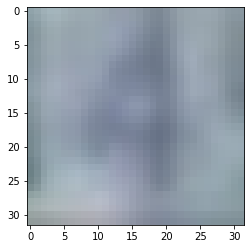

Label:  [4]


In [21]:

plt.imshow(train_images[13830])
plt.show()

print('Label: ', train_labels[13830])

In [22]:
train_images = train_images.astype('float64')
test_images = test_images.astype('float64')

In [23]:
train_labels = train_labels.astype('int64')
test_labels = test_labels.astype('int64')

In [24]:
print('Min: {}, Max: {}'.format(train_images.min(), train_images.max()))

train_images /= 255.0
test_images /= 255.0

Min: 0.0, Max: 255.0


In [25]:
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.fit_transform(test_labels)

In [26]:
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels,
                                                  test_size=0.15, random_state=22)

In [27]:
y_val.shape

(10989, 10)

In [28]:
datagen = ImageDataGenerator(rotation_range=8,
                             zoom_range=[0.95, 1.05],
                             height_shift_range=0.10,
                             shear_range=0.15)

In [29]:

keras.backend.clear_session()

aux_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same', 
                           activation='relu',
                           input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), padding='same', 
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(64, (3, 3), padding='same', 
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(128, (3, 3), padding='same', 
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.4),    
    keras.layers.Dense(10,  activation='softmax')
])

lr_schedule = keras.callbacks.LearningRateScheduler(
              lambda epoch: 1e-4 * 10**(epoch / 10))
optimizer = keras.optimizers.Adam(lr=1e-4, amsgrad=True)
aux_model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
history = aux_model.fit(datagen.flow(X_train, y_train, batch_size=128),
                              epochs=30, validation_data=(X_val, y_val),
                              callbacks=[lr_schedule])

Epoch 1/30
487/487 [==============================] - 33s 68ms/step - loss: 2.3109 - accuracy: 0.1636 - val_loss: 2.2172 - val_accuracy: 0.1949
Epoch 2/30
487/487 [==============================] - 33s 67ms/step - loss: 2.1476 - accuracy: 0.2080 - val_loss: 1.8829 - val_accuracy: 0.3190
Epoch 3/30
487/487 [==============================] - 32s 66ms/step - loss: 1.5115 - accuracy: 0.4806 - val_loss: 0.7002 - val_accuracy: 0.7902
Epoch 4/30
487/487 [==============================] - 33s 67ms/step - loss: 0.9513 - accuracy: 0.6879 - val_loss: 0.4695 - val_accuracy: 0.8592
Epoch 5/30
487/487 [==============================] - 33s 67ms/step - loss: 0.7331 - accuracy: 0.7678 - val_loss: 0.3755 - val_accuracy: 0.8870
Epoch 6/30
487/487 [==============================] - 33s 67ms/step - loss: 0.6068 - accuracy: 0.8120 - val_loss: 0.3441 - val_accuracy: 0.8978
Epoch 7/30
487/487 [==============================] - 32s 67ms/step - loss: 0.5242 - accuracy: 0.8391 - val_loss: 0.3328 - val_accuracy:

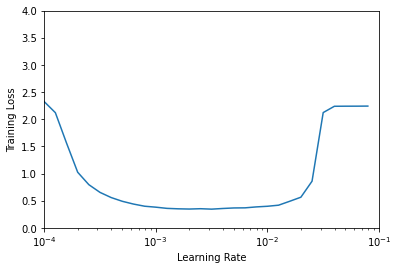

In [23]:
plt.semilogx(history.history['lr'], history.history['loss'])
plt.axis([1e-4, 1e-1, 0, 4])
plt.xlabel('Learning Rate')
plt.ylabel('Training Loss')
plt.show()

In [25]:
keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same', 
                           activation='relu',
                           input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), padding='same', 
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(64, (3, 3), padding='same', 
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(128, (3, 3), padding='same', 
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.4),    
    keras.layers.Dense(10,  activation='softmax')
])

early_stopping = keras.callbacks.EarlyStopping(patience=8)
optimizer = keras.optimizers.Adam(lr=1e-3, amsgrad=True)
model_checkpoint = keras.callbacks.ModelCheckpoint(
                   '/kaggle/working/best_cnn.h5', 
                   save_best_only=True)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
!ls -al

total 297680
drwxr-xr-x 1 root root      4096 Nov 12 13:59 .
drwxr-xr-x 1 root root      4096 Nov 12 13:26 ..
drwxr-xr-x 1 root root      4096 Nov  6 17:30 .config
-rw-r--r-- 1 root root       337 Nov 12 13:31 cv_proj.yml
-rw-r--r-- 1 root root  58468498 Jun  7  2018 Miniconda3-4.5.4-Linux-x86_64.sh
drwxr-xr-x 1 root root      4096 Nov  6 17:30 sample_data
-rw-r--r-- 1 root root  64275384 Nov 12 14:03 test_32x32.mat
-rw-r--r-- 1 root root 182040794 Nov 12 13:59 train_32x32.mat


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        2

In [28]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=128),
                              epochs=70, validation_data=(X_val, y_val),
                              callbacks=[early_stopping, model_checkpoint])

Epoch 1/70
326/487 [===================>..........] - ETA: 2:44 - loss: 2.2017 - accuracy: 0.1964

KeyboardInterrupt: ignored

In [2]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=128),
                              epochs=70, validation_data=(X_val, y_val),
                              callbacks=[early_stopping, model_checkpoint])

NameError: ignored

In [4]:
!ls -al


total 57120
drwxr-xr-x 1 root root     4096 Nov 12 22:46 .
drwxr-xr-x 1 root root     4096 Nov 12 22:37 ..
drwxr-xr-x 1 root root     4096 Nov  6 17:30 .config
-rw-r--r-- 1 root root      337 Nov 12 22:40 cv_proj.yml
-rw-r--r-- 1 root root 58468498 Jun  7  2018 Miniconda3-4.5.4-Linux-x86_64.sh
drwxr-xr-x 1 root root     4096 Nov  6 17:30 sample_data


In [3]:
!rm train_32x32.mat